In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("datatraining.txt")

### Baseline accuracy metric

The batch size here has been considered to be the entire dataset at once which is basically batch gradient descent. 3rd question requires plots with baseline accuracy line to be plotted alongside with batch GD statistics.

In [3]:
N = len(df)
D_in, H1, D_out = 5, 32, 1

In [4]:
print(N)
rand_guesses_5 = np.random.binomial(n = 1, p=0.5, size=(N,5))
max_vote_rand_labels = np.round(np.mean(rand_guesses_5, axis=1))

print(max_vote_rand_labels.shape)

8143
(8143,)


In [5]:
labe = df["Occupancy"].to_numpy()
data = df[["Temperature","Humidity","Light","CO2","HumidityRatio"]].to_numpy()
data = data / data.max(axis=0)
print(data.shape, labe.shape)


df = pd.read_csv("datatest.txt")
labeTest = df["Occupancy"].to_numpy()
dataTest = df[["Temperature","Humidity","Light","CO2","HumidityRatio"]].to_numpy()
dataTest = dataTest / dataTest.max(axis=0)

(8143, 5) (8143,)


### Baseline error

In [6]:
with torch.no_grad():
    temp1 = torch.tensor(labe, dtype=torch.float32)
    temp2 = torch.tensor(max_vote_rand_labels, dtype=torch.float32)
    base_err = torch.nn.BCELoss(reduction='mean')(temp2, temp1).item()

print(base_err)

13.83818244934082


In [7]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(H1, D_out),
    torch.nn.Sigmoid()
)

model.cuda()
loss_fn = torch.nn.BCELoss(reduction='mean')
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
epochs = 25000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loss_array = []
for t in range(epochs):
    data, labe = shuffle(data, labe)
    x = torch.tensor(data, dtype=torch.float32, device=device)
    y = torch.tensor(labe, dtype=torch.float32, device=device)
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_array.append(loss.item())
    if t%1000 == 0:
        print(t, loss.item())
    
#     if t%1000 == 0 :
#         with torch.no_grad():
#             data, labe = shuffle(data, labe)
#             x = torch.tensor(data, dtype=torch.float32, device=device)
#             y = labe
#             model.eval()
#             y_pred = model(x).cpu().numpy()
#             y_pred = np.round(y_pred)
#             print("Training set performance :",accuracy_score(y, y_pred))

#             data, labe = shuffle(dataTest, labeTest)
#             x = torch.tensor(data, dtype=torch.float32, device=device)
#             y = labe
#             y_pred = model(x).cpu().numpy()
#             y_pred = np.round(y_pred)
#             print("Test set performance :",accuracy_score(y, y_pred))

/home/grumptitan/.local/lib/python3.5/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([8143])) that is different to the input size (torch.Size([8143, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


0 0.6957732439041138
1000 0.554140031337738
2000 0.5303962230682373
3000 0.5222187042236328
4000 0.5156384110450745
5000 0.5094009637832642
6000 0.5032827258110046
7000 0.4969922602176666
8000 0.490425705909729
9000 0.4834587872028351
10000 0.47602444887161255
11000 0.4680565893650055
12000 0.45950546860694885
13000 0.45038267970085144
14000 0.4406388998031616
15000 0.43017980456352234
16000 0.41900646686553955
17000 0.4072099030017853
18000 0.3949069082736969
19000 0.3821198642253876
20000 0.36895373463630676
21000 0.3555395007133484
22000 0.34197568893432617
23000 0.3283807337284088
24000 0.31488165259361267


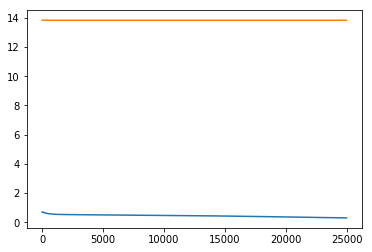

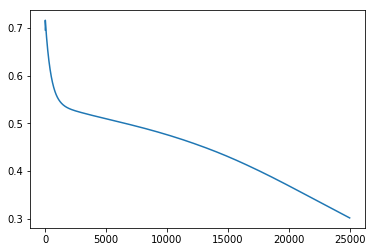

In [8]:
plt.plot(loss_array)
baseline = [base_err]*len(loss_array)
plt.plot(baseline)
plt.show()

plt.plot(loss_array)
plt.show()

#Baseline error is too high so just plotting the loss curve for reference

We can observe from the above plots that the error monotonically decreases, except for the first jump in the first epoch.

### Training and Test set performance

In [9]:
with torch.no_grad():
    data, labe = shuffle(data, labe)
    x = torch.tensor(data, dtype=torch.float32, device=device)
    y = labe
    y_pred = model(x).cpu().numpy()
    y_pred = np.round(y_pred)
    print("Training set performance :",accuracy_score(y, y_pred))

df = pd.read_csv("datatest.txt")
labeTest = df["Occupancy"].to_numpy()
dataTest = df[["Temperature","Humidity","Light","CO2","HumidityRatio"]].to_numpy()
dataTest = dataTest / dataTest.max(axis=0)

with torch.no_grad():
    data, labe = shuffle(dataTest, labeTest)
    x = torch.tensor(data, dtype=torch.float32, device=device)
    y = labe
    y_pred = model(x).cpu().numpy()
    y_pred = np.round(y_pred)
    print("Test set performance :",accuracy_score(y, y_pred))

Training set performance : 0.8408448974579393
Test set performance : 0.9061913696060038


### SGD - 5 Hidden Nodes

In [10]:
N = 100
D_in, H1, D_out = 5, 32, 1

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(H1, D_out),
    torch.nn.Sigmoid()
)

model.cuda()
loss_fn = torch.nn.BCELoss(reduction='mean')
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
epochs = 7000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loss_array1 = []

for t in range(epochs):
    data, labe = shuffle(data, labe)
    for i in range(int(len(data)/N)):
        x = data[i*N:(i+1)*N]
        y = labe[i*N:(i+1)*N]
        x = torch.tensor(x, dtype=torch.float32, device=device)
        y = torch.tensor(y, dtype=torch.float32, device=device)
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_array1.append(loss.item())
    
    if t%1000 == 0:
        print(t, loss.item())
    
#     if t%1000 == 0 :
#         model.eval()
#         with torch.no_grad():
#             data, labe = shuffle(data, labe)
#             x = torch.tensor(data, dtype=torch.float32, device=device)
#             y = labe
#             y_pred = model(x).cpu().numpy()
#             y_pred = np.round(y_pred)
#             print("Training set performance :",accuracy_score(y, y_pred))

#             data, labe = shuffle(dataTest, labeTest)
#             x = torch.tensor(data, dtype=torch.float32, device=device)
#             y = labe
#             y_pred = model(x).cpu().numpy()
#             y_pred = np.round(y_pred)
#             print("Testing set performance ::",accuracy_score(y, y_pred))

0 0.6863877773284912


/home/grumptitan/.local/lib/python3.5/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


1000 0.24796432256698608
2000 0.1810084879398346
3000 0.07716812938451767
4000 0.10325650870800018
5000 0.039347175508737564
6000 0.02762131206691265


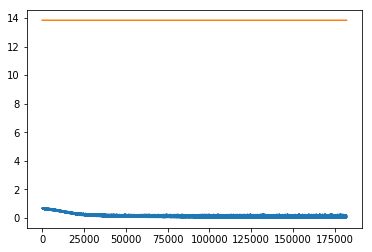

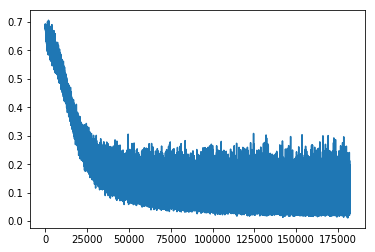

In [11]:
plt.plot(loss_array1)
baseline = [base_err]*len(loss_array1)
plt.plot(baseline)
plt.show()

plt.plot(loss_array1)
plt.show()

Please note that the loss plotted above is the loss after every mini-batch
Observing loss as an average over the epoch gives a better notion of loss

### BCE Loss but comparing different hidden layer sizes

/home/grumptitan/.local/lib/python3.5/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


1 0 0.6664260029792786
1 100 0.6248059868812561
1 200 0.5918888449668884
1 300 0.5287160277366638
1 400 0.46468591690063477
1 500 0.40141192078590393
1 600 0.3508928716182709
1 700 0.3040778934955597
1 800 0.2684447169303894
1 900 0.25063076615333557
1 1000 0.22710736095905304
1 1100 0.22836190462112427
1 1200 0.1919751614332199
1 1300 0.18802034854888916
1 1400 0.17607377469539642
1 1500 0.15352874994277954
1 1600 0.16306208074092865
1 1700 0.14933577179908752
1 1800 0.13194280862808228
1 1900 0.12824894487857819
1 2000 0.12981395423412323
1 2100 0.12407100200653076
1 2200 0.11919187754392624
1 2300 0.13151296973228455
1 2400 0.11430924385786057
1 2500 0.09800487011671066
1 2600 0.10298414528369904
1 2700 0.09431328624486923
1 2800 0.10131143033504486
1 2900 0.09474499523639679
1 3000 0.10202164947986603
1 3100 0.09372850507497787
1 3200 0.09395121783018112
1 3300 0.08672111481428146
1 3400 0.08118081837892532
1 3500 0.06822839379310608
1 3600 0.08822737634181976
1 3700 0.066939018666

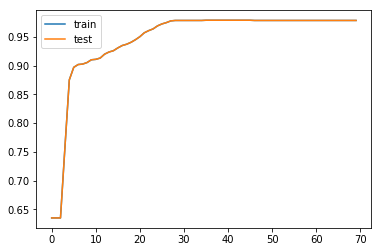

2 0 0.7109174132347107
2 100 0.6253697872161865
2 200 0.5788475275039673
2 300 0.412476509809494
2 400 0.3088148832321167
2 500 0.24280743300914764
2 600 0.2106856256723404
2 700 0.16694311797618866
2 800 0.17708995938301086
2 900 0.13797833025455475
2 1000 0.13795915246009827
2 1100 0.14161467552185059
2 1200 0.12085945904254913
2 1300 0.1158520057797432
2 1400 0.0968572124838829
2 1500 0.10742010921239853
2 1600 0.10115086287260056
2 1700 0.09741778671741486
2 1800 0.10229336470365524
2 1900 0.10084787011146545
2 2000 0.10571900755167007
2 2100 0.09167936444282532
2 2200 0.06431197375059128
2 2300 0.07844610512256622
2 2400 0.06729204207658768
2 2500 0.06945239007472992
2 2600 0.07600339502096176
2 2700 0.08665367215871811
2 2800 0.09535225480794907
2 2900 0.07945194840431213
2 3000 0.08486437052488327
2 3100 0.08227460086345673
2 3200 0.09801366180181503
2 3300 0.0724959522485733
2 3400 0.0662553459405899
2 3500 0.08244101703166962
2 3600 0.07869146764278412
2 3700 0.082776747643947

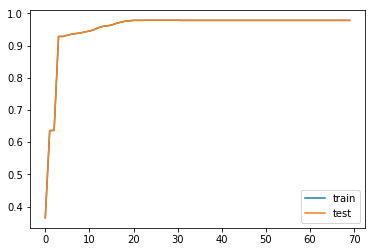

5 0 0.6924149990081787
5 100 0.6298668384552002
5 200 0.5666531920433044
5 300 0.4453465938568115
5 400 0.3382576107978821
5 500 0.1683867871761322
5 600 0.14606869220733643
5 700 0.10987304896116257
5 800 0.11027311533689499
5 900 0.09075033664703369
5 1000 0.09594863653182983
5 1100 0.09799850732088089
5 1200 0.08443312346935272
5 1300 0.0839587077498436
5 1400 0.08123704791069031
5 1500 0.0676751509308815
5 1600 0.08288000524044037
5 1700 0.08303248882293701
5 1800 0.06807210296392441
5 1900 0.07998933643102646
5 2000 0.0819573849439621
5 2100 0.07095459848642349
5 2200 0.058561693876981735
5 2300 0.07408202439546585
5 2400 0.08703026175498962
5 2500 0.08072476089000702
5 2600 0.10133729130029678
5 2700 0.06271372735500336
5 2800 0.08741940557956696
5 2900 0.0743769109249115
5 3000 0.08365902304649353
5 3100 0.06513948738574982
5 3200 0.07679329067468643
5 3300 0.08934887498617172
5 3400 0.07754522562026978
5 3500 0.06978819519281387
5 3600 0.08671984821557999
5 3700 0.0813855826854

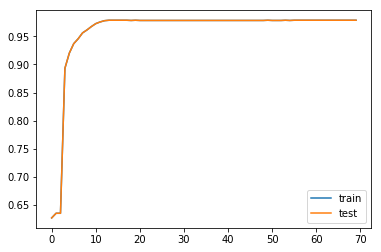

10 0 0.7183590531349182
10 100 0.5910599827766418
10 200 0.404963880777359
10 300 0.2492709904909134
10 400 0.16303318738937378
10 500 0.1430891752243042
10 600 0.1226867139339447
10 700 0.10819645971059799
10 800 0.09526953101158142
10 900 0.08674497157335281
10 1000 0.08467623591423035
10 1100 0.09983644634485245
10 1200 0.07630177587270737
10 1300 0.07855700701475143
10 1400 0.06427327543497086
10 1500 0.09204799681901932
10 1600 0.08700919151306152
10 1700 0.07541073113679886
10 1800 0.08050588518381119
10 1900 0.07110697031021118
10 2000 0.07409603893756866
10 2100 0.09170307964086533
10 2200 0.08381479978561401
10 2300 0.08814939856529236
10 2400 0.08896491676568985
10 2500 0.08401340246200562
10 2600 0.07674035429954529
10 2700 0.08230668306350708
10 2800 0.08191898465156555
10 2900 0.07664435356855392
10 3000 0.07977376133203506
10 3100 0.08532364666461945
10 3200 0.061083801090717316
10 3300 0.1040017232298851
10 3400 0.07663261890411377
10 3500 0.08151957392692566
10 3600 0.0

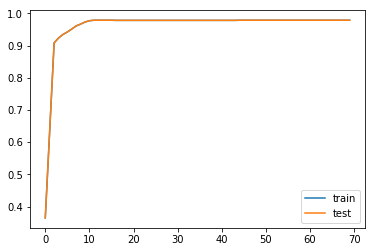

20 0 0.69682377576828
20 100 0.5431243777275085
20 200 0.2666914165019989
20 300 0.1645403653383255
20 400 0.13110964000225067
20 500 0.12236728519201279
20 600 0.10999015718698502
20 700 0.09661605209112167
20 800 0.07332678139209747
20 900 0.07842247933149338
20 1000 0.0840735211968422
20 1100 0.09413959085941315
20 1200 0.06987446546554565
20 1300 0.075029157102108
20 1400 0.08185059577226639
20 1500 0.07071354240179062
20 1600 0.07414869964122772
20 1700 0.06821583956480026
20 1800 0.08107258379459381
20 1900 0.06534139811992645
20 2000 0.08600978553295135
20 2100 0.07001318782567978
20 2200 0.08345754444599152
20 2300 0.062449924647808075
20 2400 0.07827256619930267
20 2500 0.06408925354480743
20 2600 0.08095834404230118
20 2700 0.07905042916536331
20 2800 0.07208175957202911
20 2900 0.07833221554756165
20 3000 0.06874876469373703
20 3100 0.07748960703611374
20 3200 0.06344364583492279
20 3300 0.07305833697319031
20 3400 0.06455700099468231
20 3500 0.08608181774616241
20 3600 0.07

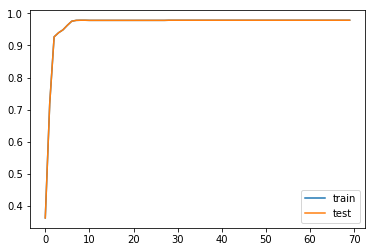

In [12]:
N = 1000
D_in, H, D_out = 5, [1,2,5,10,20], 1

for H1 in H:
    model = torch.nn.Sequential(
        torch.nn.Linear(D_in, H1),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(H1, D_out),
        torch.nn.Sigmoid()
    )

    model.cuda()
    loss_fn = torch.nn.BCELoss(reduction='mean')
    learning_rate = 1e-3
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    epochs = 7000
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    loss_array1 = []
    acc_array_tr = []
    acc_array_te = []

    for t in range(epochs):
        data, labe = shuffle(data, labe)
        for i in range(int(len(data)/N)):
            x = data[i*N:(i+1)*N]
            y = labe[i*N:(i+1)*N]
            x = torch.tensor(x, dtype=torch.float32, device=device)
            y = torch.tensor(y, dtype=torch.float32, device=device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_array1.append(loss.item())

        if t%100 == 0:
            print(H1, t, loss.item())
            
            model.eval()
            with torch.no_grad():
                data, labe = shuffle(data, labe)
                x = torch.tensor(data, dtype=torch.float32, device=device)
                y = labe
                y_pred = model(x).cpu().numpy()
                y_pred = np.round(y_pred)
                acc_array_tr.append(accuracy_score(y, y_pred))

                data, labe = shuffle(dataTest, labeTest)
                x = torch.tensor(data, dtype=torch.float32, device=device)
                y = labe
                y_pred = model(x).cpu().numpy()
                y_pred = np.round(y_pred)
                acc_array_te.append(accuracy_score(y, y_pred))
            
    plt.plot(acc_array_tr)
    plt.plot(acc_array_te)
    plt.legend(["train","test"])
    plt.show()
    
    

### MSE Loss training

1 0 0.274135947227478
1 100 0.23823317885398865
1 200 0.22520112991333008
1 300 0.22510696947574615
1 400 0.23295217752456665
1 500 0.2296871542930603
1 600 0.22797070443630219
1 700 0.23007731139659882
1 800 0.23644784092903137
1 900 0.23349624872207642
1 1000 0.23571071028709412
1 1100 0.2286367416381836
1 1200 0.23543226718902588
1 1300 0.23075059056282043
1 1400 0.22995395958423615
1 1500 0.2350281924009323
1 1600 0.2318236380815506
1 1700 0.22858208417892456
1 1800 0.2304581254720688
1 1900 0.232881560921669
1 2000 0.23153629899024963
1 2100 0.23126937448978424
1 2200 0.2336932122707367
1 2300 0.22913700342178345
1 2400 0.23015838861465454
1 2500 0.22631306946277618
1 2600 0.22991982102394104
1 2700 0.2304404079914093
1 2800 0.2339618057012558
1 2900 0.2328609973192215
1 3000 0.22627480328083038
1 3100 0.23854900896549225
1 3200 0.23260165750980377
1 3300 0.23124383389949799
1 3400 0.23124977946281433
1 3500 0.23745016753673553
1 3600 0.2328568547964096
1 3700 0.23044690489768982


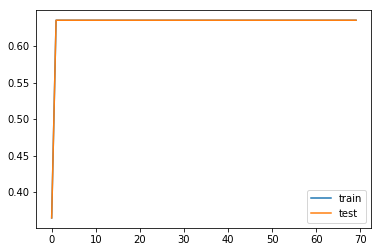

2 0 0.24252696335315704
2 100 0.23555883765220642
2 200 0.2286148965358734
2 300 0.22645631432533264
2 400 0.23315522074699402
2 500 0.2369096428155899
2 600 0.2301570624113083
2 700 0.23338356614112854
2 800 0.2323242425918579
2 900 0.232321098446846
2 1000 0.23151466250419617
2 1100 0.23367521166801453
2 1200 0.23447589576244354
2 1300 0.23470255732536316
2 1400 0.23341158032417297
2 1500 0.23394104838371277
2 1600 0.23500359058380127
2 1700 0.2315104603767395
2 1800 0.23504340648651123
2 1900 0.2355278730392456
2 2000 0.23233211040496826
2 2100 0.22404800355434418
2 2200 0.2317805141210556
2 2300 0.23529456555843353
2 2400 0.22857503592967987
2 2500 0.22662097215652466
2 2600 0.23525874316692352
2 2700 0.22988593578338623
2 2800 0.22987867891788483
2 2900 0.23314301669597626
2 3000 0.22859400510787964
2 3100 0.23338134586811066
2 3200 0.2298724204301834
2 3300 0.22640995681285858
2 3400 0.2323276549577713
2 3500 0.2333873212337494
2 3600 0.23123399913311005
2 3700 0.2304218113422393

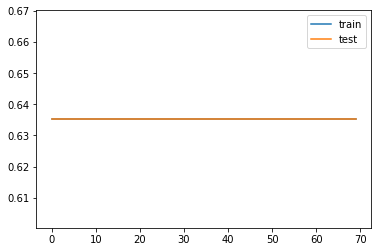

5 0 0.2812230587005615
5 100 0.23998484015464783
5 200 0.23108519613742828
5 300 0.23370228707790375
5 400 0.23471105098724365
5 500 0.23197005689144135
5 600 0.23031821846961975
5 700 0.2326953262090683
5 800 0.23850859701633453
5 900 0.2393179088830948
5 1000 0.23535406589508057
5 1100 0.23076482117176056
5 1200 0.22664813697338104
5 1300 0.23318476974964142
5 1400 0.233478382229805
5 1500 0.23316967487335205
5 1600 0.2299342006444931
5 1700 0.222158744931221
5 1800 0.2266678810119629
5 1900 0.22730766236782074
5 2000 0.22942249476909637
5 2100 0.22856156527996063
5 2200 0.22935687005519867
5 2300 0.23564644157886505
5 2400 0.22991728782653809
5 2500 0.23639793694019318
5 2600 0.2258961945772171
5 2700 0.23096711933612823
5 2800 0.23613178730010986
5 2900 0.23474086821079254
5 3000 0.23151123523712158
5 3100 0.23425596952438354
5 3200 0.2258092761039734
5 3300 0.22991159558296204
5 3400 0.2301369309425354
5 3500 0.23767732083797455
5 3600 0.23042799532413483
5 3700 0.2331514656543731

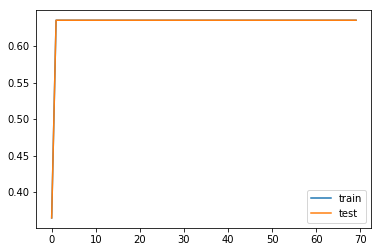

10 0 0.2323959916830063
10 100 0.2301780730485916
10 200 0.22991247475147247
10 300 0.23151323199272156
10 400 0.23285609483718872
10 500 0.23865598440170288
10 600 0.22965411841869354
10 700 0.23367491364479065
10 800 0.22842703759670258
10 900 0.2328655868768692
10 1000 0.23366154730319977
10 1100 0.2336721271276474
10 1200 0.23177595436573029
10 1300 0.2238646000623703
10 1400 0.2309575378894806
10 1500 0.2323320358991623
10 1600 0.23584164679050446
10 1700 0.23259460926055908
10 1800 0.23018407821655273
10 1900 0.23445554077625275
10 2000 0.23123250901699066
10 2100 0.22976459562778473
10 2200 0.23533999919891357
10 2300 0.2333696037530899
10 2400 0.2347680628299713
10 2500 0.23417703807353973
10 2600 0.22774825990200043
10 2700 0.2320486158132553
10 2800 0.22993585467338562
10 2900 0.23258686065673828
10 3000 0.23771874606609344
10 3100 0.23425380885601044
10 3200 0.22858989238739014
10 3300 0.22623403370380402
10 3400 0.2281910479068756
10 3500 0.23178163170814514
10 3600 0.23503

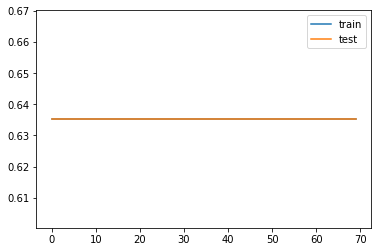

20 0 0.25876298546791077
20 100 0.23062185943126678
20 200 0.23854057490825653
20 300 0.23156334459781647
20 400 0.22993050515651703
20 500 0.23234780132770538
20 600 0.23398104310035706
20 700 0.23345831036567688
20 800 0.23205891251564026
20 900 0.23206943273544312
20 1000 0.228884756565094
20 1100 0.23312844336032867
20 1200 0.22532419860363007
20 1300 0.22884973883628845
20 1400 0.23070433735847473
20 1500 0.23450827598571777
20 1600 0.22520825266838074
20 1700 0.2340404987335205
20 1800 0.2262791395187378
20 1900 0.23123447597026825
20 2000 0.23124279081821442
20 2100 0.23603707551956177
20 2200 0.2315114289522171
20 2300 0.22875958681106567
20 2400 0.23392081260681152
20 2500 0.23531542718410492
20 2600 0.23312056064605713
20 2700 0.23205424845218658
20 2800 0.23068292438983917
20 2900 0.23040921986103058
20 3000 0.22554217278957367
20 3100 0.22745653986930847
20 3200 0.23350296914577484
20 3300 0.23423822224140167
20 3400 0.23151959478855133
20 3500 0.23339909315109253
20 3600 0

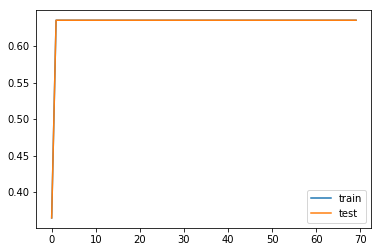

In [13]:
N = 1000
D_in, H, D_out = 5, [1,2,5,10,20], 1

for H1 in H:
    model = torch.nn.Sequential(
        torch.nn.Linear(D_in, H1),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(H1, D_out),
        torch.nn.Sigmoid()
    )

    model.cuda()
    loss_fn = torch.nn.MSELoss(reduction='mean')
    learning_rate = 1e-3
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    epochs = 7000
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    loss_array1 = []
    acc_array_tr = []
    acc_array_te = []

    for t in range(epochs):
        data, labe = shuffle(data, labe)
        for i in range(int(len(data)/N)):
            x = data[i*N:(i+1)*N]
            y = labe[i*N:(i+1)*N]
            x = torch.tensor(x, dtype=torch.float32, device=device)
            y = torch.tensor(y, dtype=torch.float32, device=device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_array1.append(loss.item())

        if t%100 == 0:
            print(H1, t, loss.item())
            
            model.eval()
            with torch.no_grad():
                data, labe = shuffle(data, labe)
                x = torch.tensor(data, dtype=torch.float32, device=device)
                y = labe
                y_pred = model(x).cpu().numpy()
                y_pred = np.round(y_pred)
                acc_array_tr.append(accuracy_score(y, y_pred))

                data, labe = shuffle(dataTest, labeTest)
                x = torch.tensor(data, dtype=torch.float32, device=device)
                y = labe
                y_pred = model(x).cpu().numpy()
                y_pred = np.round(y_pred)
                acc_array_te.append(accuracy_score(y, y_pred))
            
    plt.plot(acc_array_tr)
    plt.plot(acc_array_te)
    plt.legend(["train","test"])
    plt.show()

We can clearly see that MSE loss is subpar compared to Binary CrossEntropy loss.

In [14]:
N = 1000
D_in, Hin, D_out = 5, [1,2,4,8,16], 1
Hout = [1,2,4,8,16]

tot_acc_test = []
tot_acc_tran = []

for H1 in Hin:
    for H2 in Hout:
        model = torch.nn.Sequential(
            torch.nn.Linear(D_in, H1),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(H1, H2),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(H2, D_out),
            torch.nn.Sigmoid()
        )

        model.cuda()
        loss_fn = torch.nn.BCELoss(reduction='mean')
        learning_rate = 1e-3
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        epochs = 7000
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        loss_array1 = []

        for t in range(epochs):
            data, labe = shuffle(data, labe)
            for i in range(int(len(data)/N)):
                x = data[i*N:(i+1)*N]
                y = labe[i*N:(i+1)*N]
                x = torch.tensor(x, dtype=torch.float32, device=device)
                y = torch.tensor(y, dtype=torch.float32, device=device)
                y_pred = model(x)
                loss = loss_fn(y_pred, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                loss_array1.append(loss.item())

            if t%100 == 0:
                print(H1, H2 ,t, loss.item())

        model.eval()
        with torch.no_grad():
            data, labe = shuffle(data, labe)
            x = torch.tensor(data, dtype=torch.float32, device=device)
            y = labe
            y_pred = model(x).cpu().numpy()
            y_pred = np.round(y_pred)
            tot_acc_tran.append(accuracy_score(y, y_pred))

            data, labe = shuffle(dataTest, labeTest)
            x = torch.tensor(data, dtype=torch.float32, device=device)
            y = labe
            y_pred = model(x).cpu().numpy()
            y_pred = np.round(y_pred)
            tot_acc_test.append(accuracy_score(y, y_pred))

1 1 0 0.7275615930557251
1 1 100 0.6789618730545044
1 1 200 0.6630486249923706
1 1 300 0.6533084511756897
1 1 400 0.6625319123268127
1 1 500 0.6552001237869263
1 1 600 0.5527318716049194
1 1 700 0.37057384848594666
1 1 800 0.2906489968299866
1 1 900 0.2644577622413635
1 1 1000 0.2266264408826828
1 1 1100 0.19988597929477692
1 1 1200 0.18103325366973877
1 1 1300 0.17828069627285004
1 1 1400 0.14922598004341125
1 1 1500 0.13751235604286194
1 1 1600 0.1298171877861023
1 1 1700 0.12185268849134445
1 1 1800 0.10001352429389954
1 1 1900 0.1026601567864418
1 1 2000 0.10266196727752686
1 1 2100 0.12338198721408844
1 1 2200 0.09061302989721298
1 1 2300 0.0998833179473877
1 1 2400 0.08966077864170074
1 1 2500 0.10833258181810379
1 1 2600 0.10848040878772736
1 1 2700 0.10390324890613556
1 1 2800 0.08854538202285767
1 1 2900 0.08793673664331436
1 1 3000 0.0883374810218811
1 1 3100 0.10299988090991974
1 1 3200 0.09373022615909576
1 1 3300 0.09476996213197708
1 1 3400 0.071807861328125
1 1 3500 0.09

1 16 700 0.09387998282909393
1 16 800 0.09254162013530731
1 16 900 0.06896809488534927
1 16 1000 0.06959313154220581
1 16 1100 0.08396932482719421
1 16 1200 0.082744300365448
1 16 1300 0.09347563236951828
1 16 1400 0.08144843578338623
1 16 1500 0.07851679623126984
1 16 1600 0.07468407601118088
1 16 1700 0.0720343068242073
1 16 1800 0.06505326926708221
1 16 1900 0.06830194592475891
1 16 2000 0.06711485981941223
1 16 2100 0.05689216032624245
1 16 2200 0.06493481248617172
1 16 2300 0.08416903018951416
1 16 2400 0.07807911187410355
1 16 2500 0.07568183541297913
1 16 2600 0.05942654237151146
1 16 2700 0.07308656722307205
1 16 2800 0.05690745264291763
1 16 2900 0.05290208011865616
1 16 3000 0.07680504024028778
1 16 3100 0.0829877257347107
1 16 3200 0.06390531361103058
1 16 3300 0.05314366891980171
1 16 3400 0.07046127319335938
1 16 3500 0.05679060518741608
1 16 3600 0.07247978448867798
1 16 3700 0.07003244757652283
1 16 3800 0.057384613901376724
1 16 3900 0.07230877131223679
1 16 4000 0.0692

2 8 1100 0.0755712017416954
2 8 1200 0.10066439211368561
2 8 1300 0.10025425255298615
2 8 1400 0.07923009246587753
2 8 1500 0.07037223130464554
2 8 1600 0.09111171960830688
2 8 1700 0.08352825790643692
2 8 1800 0.0678841844201088
2 8 1900 0.0949024185538292
2 8 2000 0.07888739556074142
2 8 2100 0.0981709435582161
2 8 2200 0.10432158410549164
2 8 2300 0.0783059224486351
2 8 2400 0.07579652965068817
2 8 2500 0.09957651793956757
2 8 2600 0.07835150510072708
2 8 2700 0.0756043866276741
2 8 2800 0.0861208364367485
2 8 2900 0.07586096227169037
2 8 3000 0.08076930791139603
2 8 3100 0.08899465948343277
2 8 3200 0.07945944368839264
2 8 3300 0.07525337487459183
2 8 3400 0.087593674659729
2 8 3500 0.07688730210065842
2 8 3600 0.08727239817380905
2 8 3700 0.05587740242481232
2 8 3800 0.060711126774549484
2 8 3900 0.07103398442268372
2 8 4000 0.08299563080072403
2 8 4100 0.06867486238479614
2 8 4200 0.06488611549139023
2 8 4300 0.07950247079133987
2 8 4400 0.08274739235639572
2 8 4500 0.09229557961

4 4 1400 0.07612527161836624
4 4 1500 0.0847930833697319
4 4 1600 0.08258095383644104
4 4 1700 0.08647789061069489
4 4 1800 0.09045472741127014
4 4 1900 0.08759797364473343
4 4 2000 0.0755748376250267
4 4 2100 0.079404816031456
4 4 2200 0.08019857108592987
4 4 2300 0.06514029949903488
4 4 2400 0.062487635761499405
4 4 2500 0.0853736624121666
4 4 2600 0.06558872759342194
4 4 2700 0.061877086758613586
4 4 2800 0.0803580954670906
4 4 2900 0.08304911106824875
4 4 3000 0.05485721677541733
4 4 3100 0.06714632362127304
4 4 3200 0.07465124875307083
4 4 3300 0.07466476410627365
4 4 3400 0.0768188014626503
4 4 3500 0.05249232053756714
4 4 3600 0.06710328161716461
4 4 3700 0.07493428885936737
4 4 3800 0.05583322420716286
4 4 3900 0.06633324176073074
4 4 4000 0.07028549909591675
4 4 4100 0.047975990921258926
4 4 4200 0.05936039984226227
4 4 4300 0.08087554574012756
4 4 4400 0.06688563525676727
4 4 4500 0.07544894516468048
4 4 4600 0.07571335136890411
4 4 4700 0.0709536150097847
4 4 4800 0.07291334

8 2 1700 0.11000016331672668
8 2 1800 0.10271050781011581
8 2 1900 0.09394970536231995
8 2 2000 0.10106232762336731
8 2 2100 0.0931168794631958
8 2 2200 0.09592849016189575
8 2 2300 0.0776989758014679
8 2 2400 0.09719257801771164
8 2 2500 0.06980302184820175
8 2 2600 0.08098652958869934
8 2 2700 0.06782057136297226
8 2 2800 0.09021411836147308
8 2 2900 0.07316803187131882
8 2 3000 0.09259524196386337
8 2 3100 0.09357146918773651
8 2 3200 0.06661020219326019
8 2 3300 0.08043354749679565
8 2 3400 0.09032624959945679
8 2 3500 0.0840485543012619
8 2 3600 0.06676468998193741
8 2 3700 0.06583478301763535
8 2 3800 0.07829688489437103
8 2 3900 0.06229380518198013
8 2 4000 0.079523004591465
8 2 4100 0.08302118629217148
8 2 4200 0.058571185916662216
8 2 4300 0.05376657843589783
8 2 4400 0.07720731943845749
8 2 4500 0.07954329997301102
8 2 4600 0.07646549493074417
8 2 4700 0.07391201704740524
8 2 4800 0.062246717512607574
8 2 4900 0.07211290299892426
8 2 5000 0.05908815562725067
8 2 5100 0.067965

16 1 1900 0.08799508959054947
16 1 2000 0.0993599072098732
16 1 2100 0.08382710814476013
16 1 2200 0.06587085127830505
16 1 2300 0.08429376780986786
16 1 2400 0.08717021346092224
16 1 2500 0.07602056115865707
16 1 2600 0.07308652251958847
16 1 2700 0.062015969306230545
16 1 2800 0.09098149836063385
16 1 2900 0.07441316545009613
16 1 3000 0.06992099434137344
16 1 3100 0.07122167199850082
16 1 3200 0.06268555670976639
16 1 3300 0.061253368854522705
16 1 3400 0.07251929491758347
16 1 3500 0.06869373470544815
16 1 3600 0.06765956431627274
16 1 3700 0.07013498991727829
16 1 3800 0.07976067066192627
16 1 3900 0.05573774874210358
16 1 4000 0.06977183371782303
16 1 4100 0.05828144773840904
16 1 4200 0.07773526757955551
16 1 4300 0.07617459446191788
16 1 4400 0.06799473613500595
16 1 4500 0.06381767243146896
16 1 4600 0.05155911296606064
16 1 4700 0.04280649870634079
16 1 4800 0.06749530136585236
16 1 4900 0.05254148319363594
16 1 5000 0.06081051006913185
16 1 5100 0.05108223855495453
16 1 5200

16 16 1500 0.07137870043516159
16 16 1600 0.07599766552448273
16 16 1700 0.08955913037061691
16 16 1800 0.05194099247455597
16 16 1900 0.0433979257941246
16 16 2000 0.08236218243837357
16 16 2100 0.06480755656957626
16 16 2200 0.06800983846187592
16 16 2300 0.07687747478485107
16 16 2400 0.07604758441448212
16 16 2500 0.08056449145078659
16 16 2600 0.0649413913488388
16 16 2700 0.05457998439669609
16 16 2800 0.06338004022836685
16 16 2900 0.057647254317998886
16 16 3000 0.05391781032085419
16 16 3100 0.05825517326593399
16 16 3200 0.0697624608874321
16 16 3300 0.05751964822411537
16 16 3400 0.06522955000400543
16 16 3500 0.08934957534074783
16 16 3600 0.043043654412031174
16 16 3700 0.06263840198516846
16 16 3800 0.06895899772644043
16 16 3900 0.06603383272886276
16 16 4000 0.05931150168180466
16 16 4100 0.057885680347681046
16 16 4200 0.06698845326900482
16 16 4300 0.059491027146577835
16 16 4400 0.058423981070518494
16 16 4500 0.06578295677900314
16 16 4600 0.06253170222043991
16 16 

In [15]:
temp = np.array(tot_acc_tran)
print(temp)
print(np.argmax(temp))

temp = np.array(tot_acc_test)
print(temp)
print(np.argmax(temp))

[0.97861163 0.97861163 0.97861163 0.9782364  0.97861163 0.97861163
 0.97861163 0.97861163 0.97861163 0.97898687 0.97861163 0.97861163
 0.97861163 0.97861163 0.97861163 0.9782364  0.97861163 0.97861163
 0.97861163 0.97898687 0.97861163 0.97898687 0.97861163 0.97861163
 0.97898687]
9
[0.97861163 0.97861163 0.97861163 0.9782364  0.97861163 0.97861163
 0.97861163 0.97861163 0.97861163 0.97898687 0.97861163 0.97861163
 0.97861163 0.97861163 0.97861163 0.9782364  0.97861163 0.97861163
 0.97861163 0.97898687 0.97861163 0.97898687 0.97861163 0.97861163
 0.97898687]
9


All permutations of 2 layers with [1,2,4,8,16] hidden nodes have been evaluated

The best result from all the experiments is as follows :

2-h1-h2-16

with an accuracy of 97.89% on train set. Same case with test set